<a href="https://colab.research.google.com/github/bhojaram/TheSparkFoundation/blob/main/Unsupervised_ML_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP @The Spark Foundation**

#**Task#2 : Prediction using Unsupervised ML**

# **Author : Bhojaram SA**

In [ ]:
#import necessary libraries

from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#Creating a dataframe

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#drop the column 'Id'

In [ ]:
# prompt: remove column Id

df.drop('Id', axis=1, inplace=True)
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#EDA and pre-processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Remove the duplicates

In [ ]:
# prompt: remove the duplicates row

df.drop_duplicates(inplace=True)
df.shape


(147, 5)

#Convert object datatype to integer

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

Species
1    50
2    49
0    48
Name: count, dtype: int64

#Pair wise plot

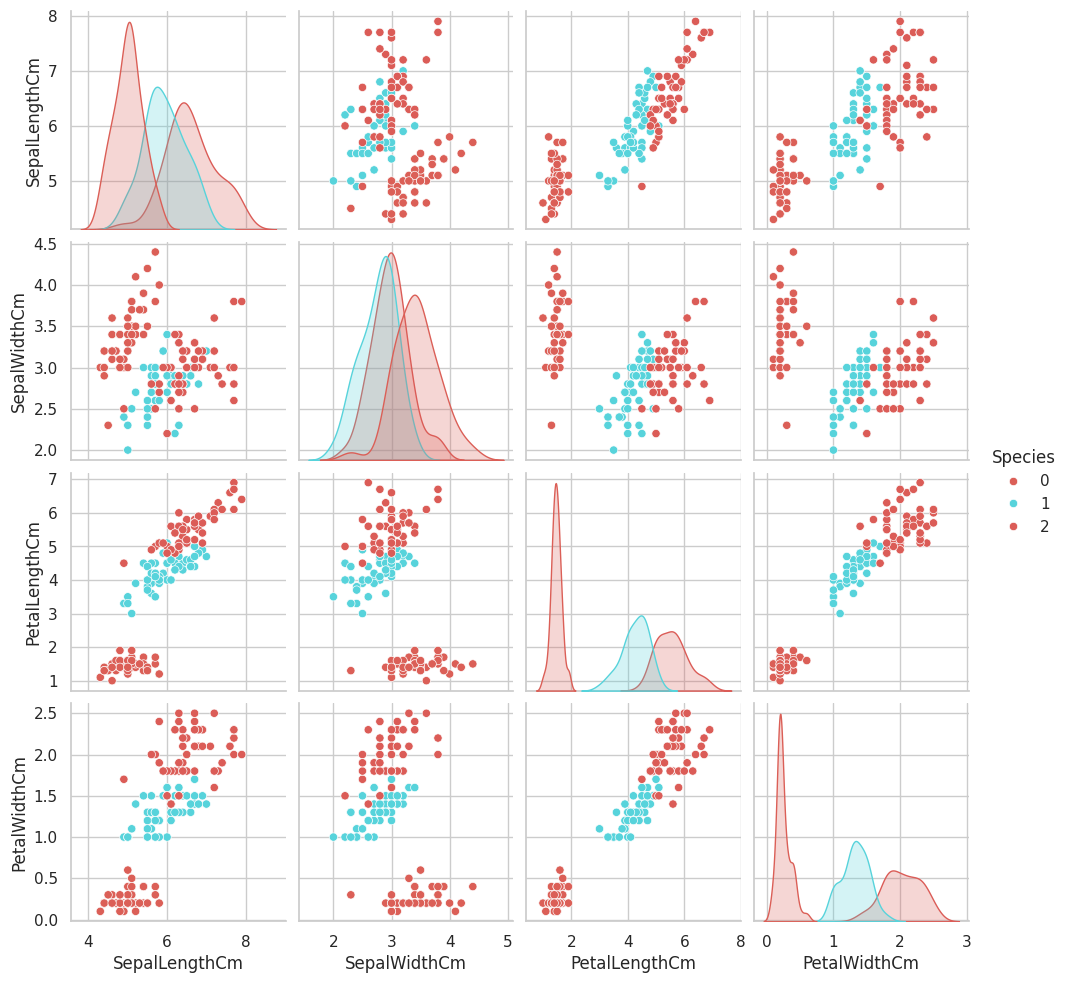

In [ ]:
# prompt: give pair wise plot with color

sns.pairplot(df, hue="Species", palette="hls")
plt.show()


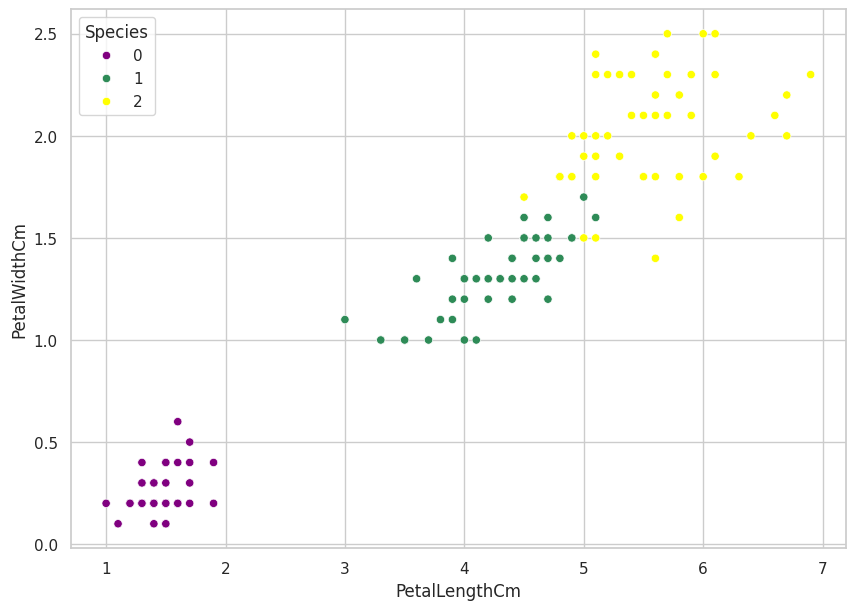

In [ ]:
# prompt: draw the plot of petalalaength and petalWidth with color seagreen, purple,yellow

plt.figure(figsize=(10, 7))
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", data=df, hue="Species", palette=["purple", "seagreen", "yellow"])
plt.show()


#Implementing the Elbow Method to determine the Optimal Number of Clusters

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[760.8884353741497,
 178.2716326530612,
 86.01057598039212,
 66.29249149659864,
 49.70517735355011,
 42.29239763054981,
 35.23231078904992,
 31.133955429031516,
 28.893206001113896,
 26.659881446039343]

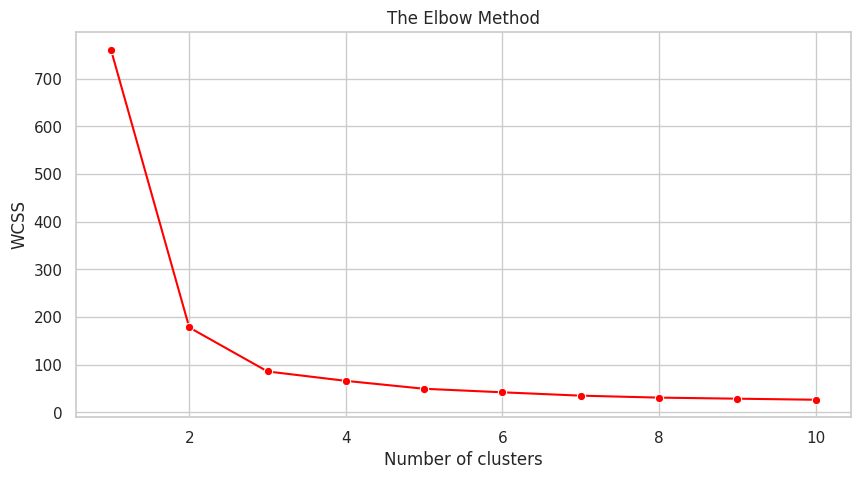

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid')
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Steps to Identify the Optimal Number of Clusters(refer above plot)**

**1. Plot the WCSS :**

* The plot will show the number of clusters on the x-axis and
the WCSS on the y-axis.
* Each point on the plot represents the WCSS for a different number of clusters.

**2.Look for the "Elbow":**

* The "elbow" point on the graph is where the WCSS starts to decrease at a slower rate.
* This indicates diminishing returns in terms of reducing the WCSS by adding more clusters.

**3.Identify the Optimal Number of Clusters:**

* The optimal number of clusters is typically at the "elbow" point. This is the point where the curve bends and starts to flatten.


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#Plot our result with centroid

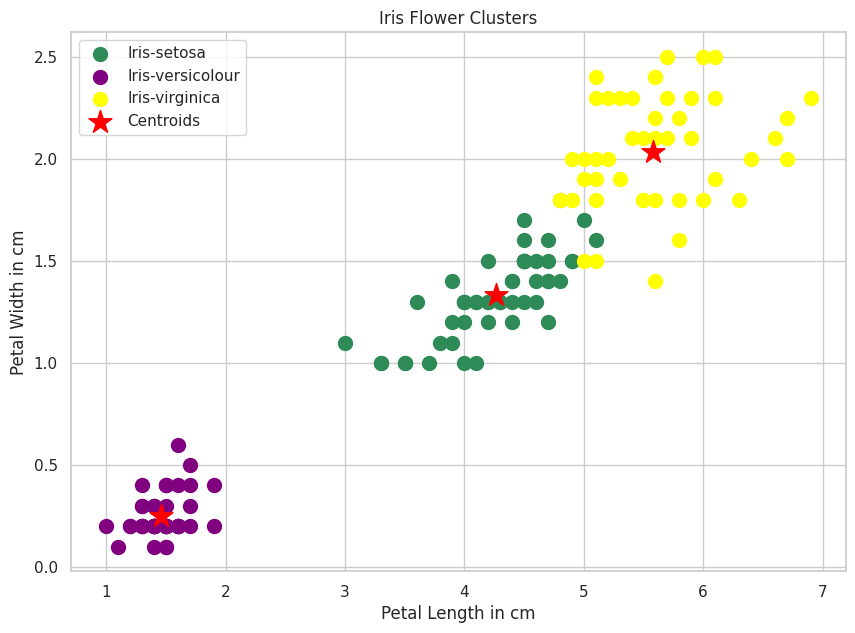

In [ ]:
# Create the plot
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids', fontweight='bold', fontsize=20)
plt.scatter(df.values[y_kmeans == 0, 2], df.values[y_kmeans == 0, 3], s=100, c='seagreen', label='Iris-setosa')
plt.scatter(df.values[y_kmeans == 1, 2], df.values[y_kmeans == 1, 3], s=100, c='purple', label='Iris-versicolour')
plt.scatter(df.values[y_kmeans == 2, 2], df.values[y_kmeans == 2, 3], s=100, c='yellow', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='*', label='Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()
plt.show()

#